# Assignment 3 - Poisson Regression and Survival Analysis
SPPH 500 - Ly Trinh

Data were derived from the Veterans’ Administration Lung Cancer study, and is saved in VeteransData.csv. This is a randomized trial of two treatment regimens for lung cancer. Investigators sought to determine the effect of two different treatments on time to death among veteran patients with lung cancer.  The goal is to decide which treatment regimen is better for survival, while adjusting for potential confounders.  The variables collected were:

VARIABLE DESCRIPTIONS 

trt: Standard = 1, test  = 2 \
celltype: Squamous =1, smallcell = 2, adeno = 3, large = 4 \
time: Survival time \
status: Censoring status \
karno: Karnofsky performance score (good = 100) \
diagtime: Months from diagnosis to randomization \
age: In years \
prior: Prior therapy (no = 0, yes = 1) \

In [153]:
# load packages
library(tidyverse) #for plotting and summary statistics
library(survival) # for survival models

In [166]:
# load data
Veterans <- read.csv('./VeteransData.csv')
dim(Veterans)
head(Veterans)

[1] 137   8

trt,celltype,time,status,karno,diagtime,age,prior
1,squamous,72,1,60,7,69,0
1,squamous,411,1,70,5,64,1
1,squamous,228,1,60,3,38,0
1,squamous,126,1,60,9,63,1
1,squamous,118,1,70,11,65,1
1,squamous,10,1,20,5,49,0


In [167]:
summary(Veterans)

      trt             celltype       time           status      
 Min.   :1.000   adeno    :27   Min.   :  1.0   Min.   :0.0000  
 1st Qu.:1.000   large    :27   1st Qu.: 25.0   1st Qu.:1.0000  
 Median :1.000   smallcell:48   Median : 80.0   Median :1.0000  
 Mean   :1.496   squamous :35   Mean   :121.6   Mean   :0.9343  
 3rd Qu.:2.000                  3rd Qu.:144.0   3rd Qu.:1.0000  
 Max.   :2.000                  Max.   :999.0   Max.   :1.0000  
     karno          diagtime           age            prior      
 Min.   :10.00   Min.   : 1.000   Min.   :34.00   Min.   :0.000  
 1st Qu.:40.00   1st Qu.: 3.000   1st Qu.:51.00   1st Qu.:0.000  
 Median :60.00   Median : 5.000   Median :62.00   Median :0.000  
 Mean   :58.57   Mean   : 8.774   Mean   :58.31   Mean   :0.292  
 3rd Qu.:75.00   3rd Qu.:11.000   3rd Qu.:66.00   3rd Qu.:1.000  
 Max.   :99.00   Max.   :87.000   Max.   :81.00   Max.   :1.000  

In [173]:
Veterans %>%
    mutate_at(c("trt", "status", "prior"), as.factor) %>%
    summary()

 trt         celltype       time       status      karno          diagtime     
 1:69   adeno    :27   Min.   :  1.0   0:  9   Min.   :10.00   Min.   : 1.000  
 2:68   large    :27   1st Qu.: 25.0   1:128   1st Qu.:40.00   1st Qu.: 3.000  
        smallcell:48   Median : 80.0           Median :60.00   Median : 5.000  
        squamous :35   Mean   :121.6           Mean   :58.57   Mean   : 8.774  
                       3rd Qu.:144.0           3rd Qu.:75.00   3rd Qu.:11.000  
                       Max.   :999.0           Max.   :99.00   Max.   :87.000  
      age        prior 
 Min.   :34.00   0:97  
 1st Qu.:51.00   1:40  
 Median :62.00         
 Mean   :58.31         
 3rd Qu.:66.00         
 Max.   :81.00         

In [ ]:
# what's 0 and 1 for status??

#### (a)  KM Model: 

Fit a simple Kaplan-Meier Survival model to compare survival times for treatment 1 and treatment 2.  Do not use any other variables when fitting this ‘crude’ model.  Produce a plot of the fitted survival curves, and comment on any apparent difference in the 2 groups. 

In [169]:
# crude model
km.mod1 <- survfit(Surv(time, status)~trt, data=Veterans, type="kaplan-meier")
# summary(km.mod1) # not run

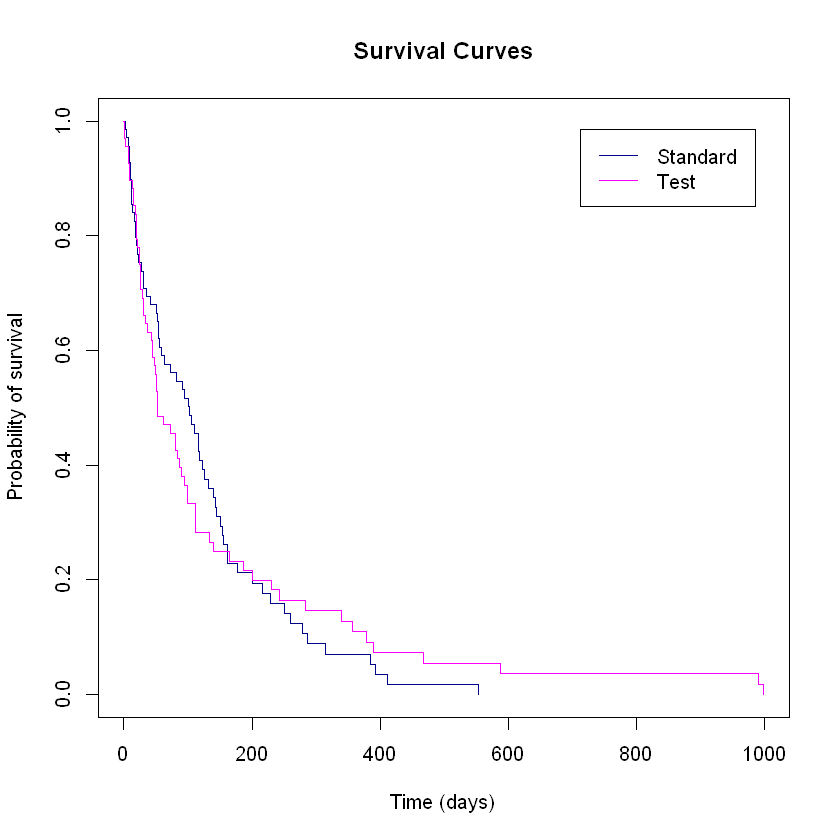

In [177]:
# plot of fitted survival curves
plot(km.mod1, col=c("darkblue", "magenta"),
     main="Survival Curves",
     xlab="Time (days)",
     ylab="Probability of survival")
legend("topright",c("Standard","Test"),lty=1, 
       inset=.05, col=c("darkblue","magenta"))

#### (b)  Is There a Difference?: 

Report a statistical test to decide if there appears to be any significant difference in the 2 Kaplan-Meier survival curves, for the two treatment groups.  Also, report the median survival time for each group. 

In [180]:
# test for statistically significance
survdiff(Surv(time, status)~trt, data=Veterans)

Call:
survdiff(formula = Surv(time, status) ~ trt, data = Veterans)

       N Observed Expected (O-E)^2/E (O-E)^2/V
trt=1 69       64     64.5   0.00388   0.00823
trt=2 68       64     63.5   0.00394   0.00823

 Chisq= 0  on 1 degrees of freedom, p= 0.9 

In [181]:
# median survival time
km.mod1

Call: survfit(formula = Surv(time, status) ~ trt, data = Veterans, 
    type = "kaplan-meier")

       n events median 0.95LCL 0.95UCL
trt=1 69     64  103.0      59     132
trt=2 68     64   52.5      44      95

#### (c)  Cox PH Model: 
Fit a Cox Proportional Hazards model using all of the available variables.  Report and interpret the hazard ratio associated with the variable ‘trt’. 

In [186]:
Veterans_fct <- Veterans %>%
    mutate(trt=as.factor(trt))

In [187]:
cox.mod1 <- coxph(Surv(time,status)~., data=Veterans_fct)
summary(cox.mod1)

Call:
coxph(formula = Surv(time, status) ~ ., data = Veterans_fct)

  n= 137, number of events= 128 

                        coef  exp(coef)   se(coef)      z Pr(>|z|)    
trt2               2.946e-01  1.343e+00  2.075e-01  1.419  0.15577    
celltypelarge     -7.948e-01  4.517e-01  3.029e-01 -2.624  0.00869 ** 
celltypesmallcell -3.345e-01  7.157e-01  2.760e-01 -1.212  0.22548    
celltypesquamous  -1.196e+00  3.024e-01  3.009e-01 -3.975 7.05e-05 ***
karno             -3.282e-02  9.677e-01  5.508e-03 -5.958 2.55e-09 ***
diagtime           8.132e-05  1.000e+00  9.136e-03  0.009  0.99290    
age               -8.706e-03  9.913e-01  9.300e-03 -0.936  0.34920    
prior              7.159e-02  1.074e+00  2.323e-01  0.308  0.75794    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                  exp(coef) exp(-coef) lower .95 upper .95
trt2                 1.3426     0.7448    0.8939    2.0166
celltypelarge        0.4517     2.2139    0.2495    0.8178
celltypesmallc

#### (d)  Assumptions:  

What are the assumptions for the Cox PH model?  What are the consequences of the assumption about censoring not being met?  What are the consequences of the assumption about proportional hazards not being met? 

#### (e)  Assumptions:  

Test the assumption of proportional hazards, for each of the variables.       
HINT:  the cox.zph command in R may be useful. 

In [184]:
cox.zph(cox.mod1)

                      rho   chisq        p
trt               -0.0273  0.1227 0.726104
celltypelarge      0.0152  0.0314 0.859449
celltypesmallcell -0.1375  2.9615 0.085270
celltypesquamous  -0.1424  2.9794 0.084329
karno              0.3073 13.0449 0.000304
diagtime           0.1491  2.9436 0.086217
age                0.1890  5.3476 0.020750
prior             -0.1767  4.4714 0.034467
GLOBAL                 NA 27.9972 0.000475